# importing modules

In [1]:
import tensorflow as tf         # importing tensorflow module
import os                       # importing os module  (operating system tasks)
import matplotlib.pyplot as mpl #importing matplotlib module
import numpy as np              #importing numpy module
import seaborn as sb            #importing seaborn module
import pandas as pd             #importing pandas module
import keras.models as kmd      #importing keras modles module
import keras.layers as klay     #importing keras layers module
import tensorflow.keras.preprocessing.image as kimg  #importing image library from tensorflow module
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
from tqdm.notebook import tqdm  # importing tqdm(taqaddum)      #It helps us in visualizing the completion of the loop.

# load the Data

In [2]:
# initializing the directories to variables
trainDir = "C:/Users/teja/OneDrive/Desktop/MLDLAssignments/mldl_final_project/leapGestRecog/leapGestRecog/training/"
testDir = "C:/Users/teja/OneDrive/Desktop/MLDLAssignments/mldl_final_project/leapGestRecog/leapGestRecog/testing/"

In [3]:
#function for traversing the files in the directories 
def loadData(dir):
    paths=[]
    gestures=[]
    
    for item in os.listdir(dir):
            for file in os.listdir(dir+item):
                imagePath = os.path.join(dir, item, file)
                paths.append(imagePath)
                gestures.append(item)
            print(item)
    return paths, gestures

In [4]:
#assigning the train data to dataframe
train = pd.DataFrame()
train['image'], train['gesture'] = loadData(trainDir)

01_palm
02_l
03_fist
04_fist_moved
05_thumb
06_index
07_ok
08_palm_moved
09_c
10_down


In [5]:
#assigning the validation data to dataframe
test = pd.DataFrame()
test['image'], test['gesture'] = loadData(testDir)

01_palm
02_l
03_fist
04_fist_moved
05_thumb
06_index
07_ok
08_palm_moved
09_c
10_down


# Finding the details of the images

PNG
L
(640, 240)


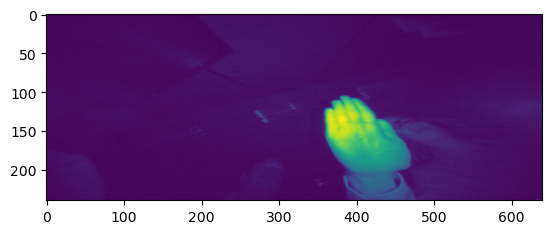

In [6]:
# finding Image details and displaying it
import PIL.Image as img                  # importing PIL library for finding the details of the image
picture = img.open(train['image'][0])
print(picture.format)
print(picture.mode)
print(picture.size)
mpl.imshow(picture)

In [7]:
# from above output, we see the picture mode as "L", which means greyscale
# size of the picture is 48X48

# image extraction and preprocessing

In [8]:
#function for extaracting the image and preprocessing the image
def extract_image(images):
    img_array = []
    for image in tqdm(images):
        img = np.array(kimg.load_img(image, color_mode="grayscale", target_size=(48, 48))) #setting the color to "grayscale"
        img_array.append(img)
    img_array = np.array(img_array)
    return img_array

In [9]:
# function call for  extracting the image and preprocessing the image
train_data = extract_image(train['image'])
test_data = extract_image(test['image'])

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/7800 [00:00<?, ?it/s]

In [10]:
# convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['gesture'])
y_train = le.transform(train['gesture'])
y_test = le.transform(test['gesture'])

In [11]:
#printing the sizes of each array of category
print(y_train.size)
print(y_test.size)
y_test           #displaying the encoded category data of validation set

12000
7800


array([0, 0, 0, ..., 9, 9, 9])

In [12]:
#categorizing the category data for train and validation
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
#normalizing the image data by converting the pixels from range "0(Black) to 255(white)" to 0 to 1
x_train=train_data/255.0
x_test=test_data/255.0

In [14]:
#showing the normalized image data
x_test

array([[[0.01176471, 0.01568627, 0.01568627, ..., 0.01176471,
         0.01176471, 0.01960784],
        [0.01176471, 0.01960784, 0.02352941, ..., 0.01568627,
         0.01176471, 0.01568627],
        [0.01176471, 0.01568627, 0.01960784, ..., 0.01568627,
         0.00784314, 0.01568627],
        ...,
        [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627,
         0.01568627, 0.01176471],
        [0.02745098, 0.01568627, 0.01568627, ..., 0.01568627,
         0.01176471, 0.01568627],
        [0.01960784, 0.01568627, 0.01960784, ..., 0.01960784,
         0.01568627, 0.01960784]],

       [[0.01960784, 0.01568627, 0.01960784, ..., 0.01568627,
         0.01960784, 0.01568627],
        [0.02352941, 0.01960784, 0.02352941, ..., 0.01568627,
         0.01960784, 0.01568627],
        [0.01568627, 0.02352941, 0.02352941, ..., 0.00784314,
         0.01568627, 0.01176471],
        ...,
        [0.01176471, 0.01960784, 0.01568627, ..., 0.01960784,
         0.01568627, 0.01568627],
        [0.0

In [15]:
# configuring the input shape and output class
input_shape = (48, 48, 1)
output_class = 10

# Creation of Model

In [16]:
model = kmd.Sequential()
# convolutional layers
#creating a 4 layer CNN  module with 3X3 kernel size and "relu" as activation function
#used maxpooling  with a pool size of 2X2
#layer 1
model.add(klay.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(klay.MaxPooling2D(pool_size=(2,2)))
model.add(klay.Dropout(0.4))
#layer 2
model.add(klay.Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(klay.MaxPooling2D(pool_size=(2,2)))
model.add(klay.Dropout(0.4))
#layer 3
model.add(klay.Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(klay.MaxPooling2D(pool_size=(2,2)))
model.add(klay.Dropout(0.4))
#layer 4
model.add(klay.Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(klay.MaxPooling2D(pool_size=(2,2)))
model.add(klay.Dropout(0.4))

model.add(klay.Flatten()) # flattening the model
# fully connected layers
model.add(klay.Dense(512, activation='relu'))
model.add(klay.Dropout(0.4))
model.add(klay.Dense(256, activation='relu'))
model.add(klay.Dropout(0.3))
# output layer
# output layer is generated sing the activation function of "Soft max"
model.add(klay.Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [17]:
model.summary()      # showing the summary of the model created

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [18]:
# training the model with epochs of 100
tarin_model = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
94/94 [==============================] - 239s 3s/step - loss: 1.8842 - accuracy: 0.2803 - val_loss: 1.1965 - val_accuracy: 0.5903
Epoch 2/10
94/94 [==============================] - 259s 3s/step - loss: 0.1713 - accuracy: 0.9424 - val_loss: 0.9042 - val_accuracy: 0.8568
Epoch 3/10
94/94 [==============================] - 264s 3s/step - loss: 0.0274 - accuracy: 0.9923 - val_loss: 0.9667 - val_accuracy: 0.8708
Epoch 4/10
94/94 [==============================] - 278s 3s/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.9802 - val_accuracy: 0.8605
Epoch 5/10
94/94 [==============================] - 280s 3s/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 1.3561 - val_accuracy: 0.8382
Epoch 6/10
94/94 [==============================] - 283s 3s/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.9313 - val_accuracy: 0.8764
Epoch 7/10
94/94 [==============================] - 271s 3s/step - loss: 0.0180 - accuracy: 0.9953 - val_loss: 0.9891 - val_accuracy: 0.8608
Epoch 8/10
94

In [35]:
model.save("gesture_cnn_predict.h5")

# Training/validation curves of accuracy and loss

In [20]:
from keras.models import load_model

trained_model = load_model('gesture_cnn_predict.h5')

In [21]:
trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

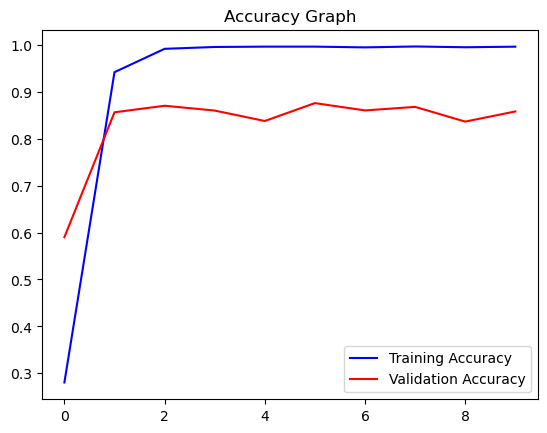

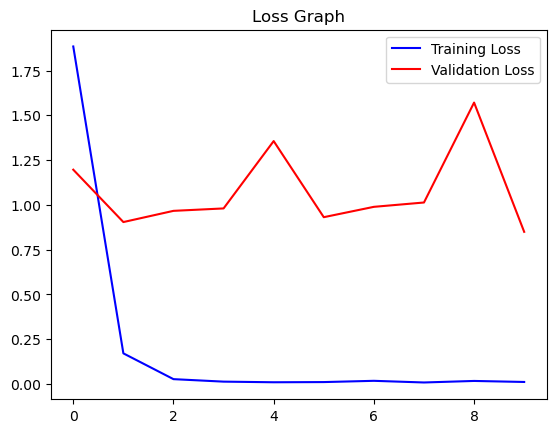

In [22]:
# plotting the graph for training accuracy and validation accuracy
acc = tarin_model.history['accuracy']
val_acc = tarin_model.history['val_accuracy']
acc_epochs = range(len(acc))

mpl.plot(acc_epochs, acc, 'b', label='Training Accuracy')
mpl.plot(acc_epochs, val_acc, 'r', label='Validation Accuracy')
mpl.title('Accuracy Graph')
mpl.legend()
mpl.figure()

#plotting the graph for training loss and validation loss
loss = tarin_model.history['loss']
val_loss = tarin_model.history['val_loss']
loss_epochs = range(len(acc))

mpl.plot(loss_epochs, loss, 'b', label='Training Loss')
mpl.plot(loss_epochs, val_loss, 'r', label='Validation Loss')
mpl.title('Loss Graph')
mpl.legend()

mpl.show()

# Confusion Matrix

In [23]:
#confusion matrix
actual_array =[]
pred_array=[]
# listing the predicted result  and appending it to pred_array
for item in tqdm(x_test):
    pred = model.predict(item.reshape(1, 48, 48, 1));
    prediction_label = le.inverse_transform([pred.argmax()])[0];
    pred_array.append(prediction_label);

  0%|          | 0/7800 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


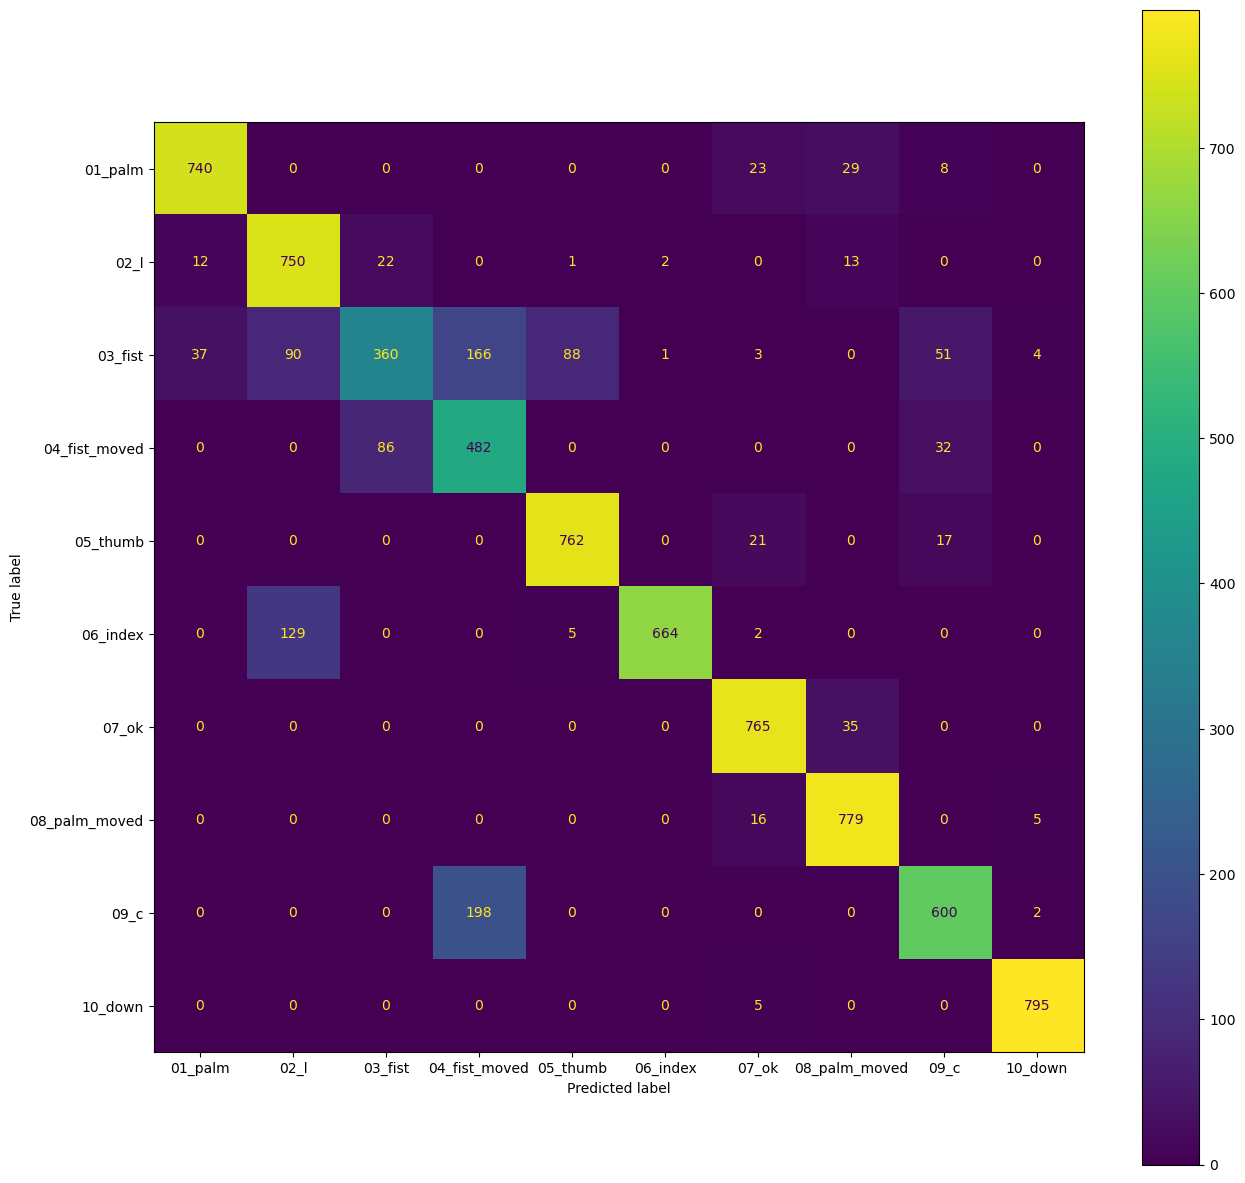

In [25]:
# listing the actual result and appending it to pred_array 
actual_array = np.array(test['gesture']);
actual = actual_array;
pred_array = np.array(pred_array);
predicted = pred_array; 
lab= np.unique(actual)              # Getting the categories for labling the heatmap
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = lab )
fig, ax = mpl.subplots(figsize=(15, 15))
cm_display.plot(ax=ax) 

In [26]:
#showing the confusion matrix  in matrix form
confusion_matrix = metrics.confusion_matrix(actual, predicted)
print(confusion_matrix.sum())         # total number of entries for validating the input
confusion_matrix

7800


array([[740,   0,   0,   0,   0,   0,  23,  29,   8,   0],
       [ 12, 750,  22,   0,   1,   2,   0,  13,   0,   0],
       [ 37,  90, 360, 166,  88,   1,   3,   0,  51,   4],
       [  0,   0,  86, 482,   0,   0,   0,   0,  32,   0],
       [  0,   0,   0,   0, 762,   0,  21,   0,  17,   0],
       [  0, 129,   0,   0,   5, 664,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 765,  35,   0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 779,   0,   5],
       [  0,   0,   0, 198,   0,   0,   0,   0, 600,   2],
       [  0,   0,   0,   0,   0,   0,   5,   0,   0, 795]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(actual, predicted, average='weighted')
recall = recall_score(actual, predicted, average='weighted')
f1 = f1_score(actual, predicted, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.8670911954502573
Recall: 0.8585897435897436
F1 score: 0.8548816915272457


# Overall Validation accuracy

In [29]:
overal_accuracy = metrics.accuracy_score(actual, predicted)*100
print("overall test accuracy is ", overal_accuracy) 

overall test accuracy is  85.85897435897436
